In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
import math

In [2]:
def getMatrix(height,width):
    i=0
    j=0
    while i<height:
        while j<width:
            pixel_Matrix[i,j]=img.getpixel((i,j))[0]
            j+=1
        j=0
        i+=1
        

In [3]:
def pearson_corr(fi,fj):
    x=pixel_Matrix[:, fi]
    y=pixel_Matrix[:, fj]
    k_x=[]
    k_y=[]
    k_x_sq=[]
    k_y_sq=[]
    l=[]
    sum_x=np.sum(x)
    sum_y=np.sum(y)
    x_bar=sum_x/len(x)
    y_bar=sum_y/len(y)
    for i in x:
        k_x.append(i-x_bar)
    for i in y:
        k_y.append(i-y_bar)
    for i in k_x:
        k_x_sq.append(i*i)
    for i in k_y:
        k_y_sq.append(i*i)
    sum_k_x_sq=np.sum(k_x_sq)
    std_dv_x=sum_k_x_sq/len(x)
    sum_k_y_sq=np.sum(k_y_sq)
    std_dv_y=sum_k_y_sq/len(y)
    i=0
    while i<len(x):
        l.append(k_x[i]*k_y[i])
        i+=1
    sum_of_l=np.sum(l)
    cov_x_y=sum_of_l/len(x)
    #pears_corr=cov_x_y/((math.sqrt(std_dv_x))*(math.sqrt(std_dv_y)))
    pears_corr=float("{:.2f}".format(cov_x_y/((math.sqrt(std_dv_x))*(math.sqrt(std_dv_y)))))
    
    #del x
    #del y
    #del k_x
    #del k_y
    #del k_x_sq
    #del k_y_sq
    #del l
    
    return pears_corr


In [4]:
def getCorr(height,width):
    i=j=0
    while i<height:
        while j<width:
            corr_matrix[i,j]=pearson_corr(i,j)
            j+=1
        j=0
        i+=1
    
    
    #row=0
    #col=0
    #while row<height:
    #    a=[]
    #    while col<width:
    #        a.append(pearson_corr(row,col))
    #        col+=1
    #    corr_matrix.append(a)
    #    col=0
    #    row+=1
    

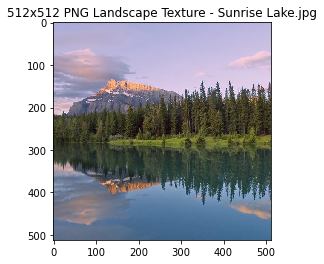

Matrix PXL :
 [[174 174 174 ...  94  95  96]
 [174 174 174 ...  94  94  95]
 [174 174 174 ...  93  93  92]
 ...
 [188 188 188 ...  65  65  66]
 [188 188 188 ...  65  66  66]
 [188 188 188 ...  65  66  67]]


In [5]:
img=Image.open(r'C:\Users\Biswarup Mistry\Downloads\128.jpg')
px=img.load()
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.title('512x512 PNG Landscape Texture - Sunrise Lake.jpg')
plt.show()
width, height = img.size
pixel_Matrix = np.matrix(np.arange(height*width).reshape(height,width))
getMatrix(height,width)
print('Matrix PXL :\n',pixel_Matrix)


corr_matrix=np.matrix(np.arange(height*width).reshape(height,width))
#getCorr(height,width)
    

In [14]:
getCorr(height,width)

KeyboardInterrupt: 

In [16]:
print(np.vstack(corr_matrix))
print(len(corr_matrix))

[[     1      1      0 ...      0      0      0]
 [     1      1      0 ...      0      0      0]
 [     0      0      1 ...      0      0      0]
 ...
 [260608 260609 260610 ... 261117 261118 261119]
 [261120 261121 261122 ... 261629 261630 261631]
 [261632 261633 261634 ... 262141 262142 262143]]
512


In [12]:
d=np.corrcoef(pixel_Matrix)
print(d)
print(len(d))

[[1.         0.99487649 0.99080758 ... 0.44209668 0.46133886 0.474063  ]
 [0.99487649 1.         0.99068509 ... 0.45113202 0.46664004 0.47773139]
 [0.99080758 0.99068509 1.         ... 0.43308    0.4475665  0.45970939]
 ...
 [0.44209668 0.45113202 0.43308    ... 1.         0.9615591  0.92931802]
 [0.46133886 0.46664004 0.4475665  ... 0.9615591  1.         0.96747138]
 [0.474063   0.47773139 0.45970939 ... 0.92931802 0.96747138 1.        ]]
512


0.9674713752724127


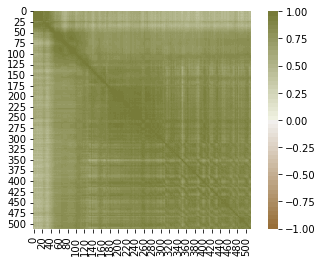

In [13]:
print(d[511,510])

axiz_Corr=sns.heatmap(d,
            vmin=-1,vmax=1,center=0,
            cmap=sns.diverging_palette(50,450,n=50),
            square=True
           )


